In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.0.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.6
pandas 0.24.2
sklearn 0.20.3
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


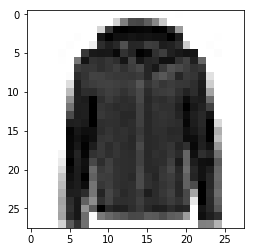

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

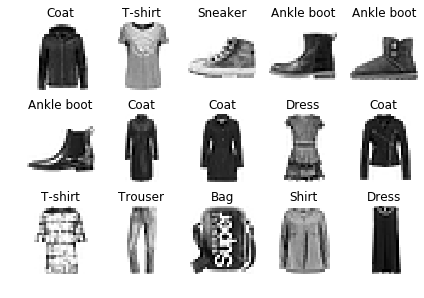

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)


In [5]:
# tf.keras.models.Sequential()

"""
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
"""

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3

# reason for sparse: y->index. y->one_hot->[] 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [6]:
model.layers

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# [None, 784] * W + b -> [None, 300] W.shape [784, 300], b = [300]

In [9]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 5s 99us/sample - loss: 30054442774245.6719 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0914
Epoch 2/10
55000/55000 [==============================] - 5s 94us/sample - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.1002
Epoch 3/10
55000/55000 [==============================] - 5s 97us/sample - loss: 2.3026 - accuracy: 0.0979 - val_loss: 2.3030 - val_accuracy: 0.0914
Epoch 4/10
55000/55000 [==============================] - 7s 123us/sample - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.0986
Epoch 5/10
55000/55000 [==============================] - 5s 88us/sample - loss: 2.3026 - accuracy: 0.0988 - val_loss: 2.3028 - val_accuracy: 0.1024
Epoch 6/10
55000/55000 [==============================] - 5s 87us/sample - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3027 - val_accuracy: 0.0914
Epoch 7/10
55000/55000 [===================

In [10]:
type(history)

tensorflow.python.keras.callbacks.History

In [11]:
history.history

{'loss': [30054442774245.668,
  2.302615747451782,
  2.30259339984547,
  2.3026219161640515,
  2.3025979142969306,
  2.302605425643921,
  2.3026005676616323,
  2.3026123413432726,
  2.3026000381469727,
  2.302604778151079],
 'accuracy': [0.0986,
  0.09836364,
  0.09794545,
  0.09845454,
  0.0988,
  0.09730909,
  0.09929091,
  0.09741818,
  0.099581815,
  0.09849091],
 'val_loss': [2.302750194168091,
  2.3028333099365232,
  2.30300622253418,
  2.3028330879211425,
  2.3028235729217528,
  2.3027246734619142,
  2.302679920196533,
  2.3027210876464843,
  2.302936580657959,
  2.3028476230621338],
 'val_accuracy': [0.0914,
  0.1002,
  0.0914,
  0.0986,
  0.1024,
  0.0914,
  0.1008,
  0.098,
  0.0914,
  0.0914]}

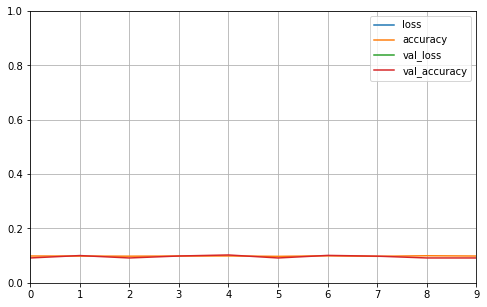

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

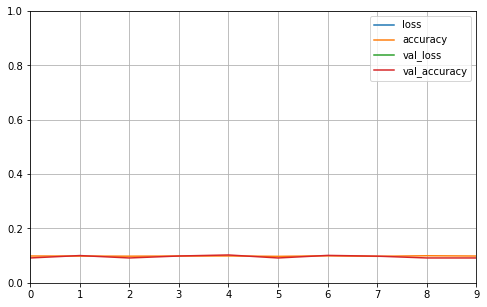

In [13]:
plot_learning_curves(history)

In [14]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.3033258491516113, 0.1]